<a href="https://colab.research.google.com/github/DataScienceAndEngineering/deep-learning-final-project-project-sidewalk/blob/rabiul/notebooks%20/Rabiul/Baseline_Obs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os,sys
ROOT_DIR = '/content/drive/MyDrive/cityscapes/models/maskrcnn'
sys.path.append(ROOT_DIR)

from mrcnn import config, utils, visualize
import helper 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import transform
import cv2
from collections import namedtuple
import os, shutil,sys
import pandas as pd
import numpy as np 
from skimage.draw import polygon
import json
from skimage import transform
from sklearn.metrics import jaccard_score
import random
from sklearn.model_selection import train_test_split

In [5]:
IMG_DIR = '/content/drive/MyDrive/cityscapes/data/images'
MASK_DIR = '/content/drive/MyDrive/cityscapes/data/segmentations'
LABEL_DIR = '/content/drive/MyDrive/cityscapes/data/labels_obs.csv'

In [242]:
# read all the labels and convert them to dictionary
#{img_name: [(class_ids), (obstacle_ids)]}
labels = pd.read_csv(LABEL_DIR, index_col=None)
labels = labels.set_index('ID').T.to_dict('list')

In [ ]:
labels['krefeld_000000_035398']

In [248]:
def get_bboxes(id, labels):
  img_path = f'/content/drive/MyDrive/cityscapes/data/images/{id}.png'  
  mask_path = f'/content/drive/MyDrive/cityscapes/data/segmentations/{id}.json'

  class_labels, obstruction_labels = labels[0], labels[1]
  class_labels, obstruction_labels =  np.array([int(i) for i in class_labels.split(' ')[:-1]]), np.array([int(i) for i in obstruction_labels.split(' ')[:-1]])

  # create mask using `helper.createmask`
  # output: [H,W, num of labels]
  masks = helper.create_mask(mask_path,class_labels, resize= (256,512))
  # generate bounding box `utils.extractbboxes`
  # bboxes are shape [num of labels, (y1,x1,y2,x2)]
  bboxes = utils.extract_bboxes(masks)
  return masks, bboxes,obstruction_labels



def get_crop(img, crop):
  # crop can be achieved with bbox[n]
  # check image size against masks size make sure its reized to (256,512) !
  y1,x1,y2,x2 = crop
  return img[y1:y2,x1:x2]


In [211]:
# sample use
masks,bboxes,obstruction_labels,class_labels = get_bboxes('krefeld_000000_035398',labels['krefeld_000000_035398'])
img = plt.imread('/content/drive/MyDrive/cityscapes/data/images/krefeld_000000_035398.png')
img = transform.resize(img,(256,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [263]:
for i, v in enumerate(labels.items()):
  train = pd.DataFrame()
  x,y = v #x = image id, y = image classes and obstruction classes labels 
  print(x)
  print(y)
  break

strasbourg_000000_001278
['21 21 21 12 8 12 8 17 21 8 17 17 17 17 17 17 17 17 17 17 17 17 26 26 26 26 21 21 17 17 17 17 26 26 17 17 26 26 26 26 26 26 26 26 ', '0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 ']


In [ ]:
for i, v in enumerate(labels.items()):
  
  train = pd.DataFrame()
  x,y = v #x = image id, y = image classes and obstruction classes labels 
  #generating image mask, bounding box, and obstruction labels
  masks,bboxes,obstruction_labels = get_bboxes('krefeld_000000_035398',labels['krefeld_000000_035398'])
  img = cv2.imread('/content/drive/MyDrive/cityscapes/data/images/krefeld_000000_035398.png', 0)
  img = transform.resize(img,(256,512))
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  for x in range(len(bboxes)):
    if 0 in bboxes[x]:
      continue
    y1,x1,y2,x2 = bboxes[x]
    m = img[y1:y2,x1:x2]
    m =cv2.resize(m,(200,200))
    df2 = pd.DataFrame([m.reshape(-1)])
    df2['label'] = obstruction_labels[x]
    train =pd.concat([train, df2])
  if i==30:
    break

In [264]:
masks,bboxes,obstruction_labels = get_bboxes(x,y)

In [265]:
masks.shape


(256, 512, 44)

In [270]:
train = pd.DataFrame()
for i, v in enumerate(labels.items()):
  x,y = v #x = image id, y = image classes and obstruction classes labels 
  #generating image mask, bounding box, and obstruction labels
  img_path = f'/content/drive/MyDrive/cityscapes/data/images/{x}.png' 
  masks,bboxes,obstruction_labels = get_bboxes(x,y)
  img = cv2.imread(img_path, 0)
  img = transform.resize(img,(256,512))
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  for x in range(len(bboxes)):
    if 0 in bboxes[x]:
      continue
    y1,x1,y2,x2 = bboxes[x]
    m = img[y1:y2,x1:x2]
    m =cv2.resize(m,(200,200))
    df2 = pd.DataFrame([m.reshape(-1)])
    df2['label'] = obstruction_labels[x]
    train =pd.concat([train, df2])
  if i==30:
    break

In [271]:
train.shape

(1015, 40001)

In [272]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.198506,0.196024,0.188353,0.180682,0.173484,0.166299,0.162969,0.162025,0.161385,0.161592,...,0.281117,0.296417,0.308956,0.313222,0.304122,0.295226,0.293074,0.290921,0.290225,0
0,0.789903,0.789003,0.779174,0.769344,0.750925,0.709821,0.668717,0.657673,0.682236,0.706799,...,0.170903,0.171636,0.172338,0.173014,0.173690,0.174004,0.174181,0.174358,0.174375,0
0,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,...,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,1
0,0.267247,0.267247,0.267247,0.267247,0.267247,0.271484,0.277225,0.282967,0.288708,0.294449,...,0.144443,0.142749,0.141055,0.139361,0.138111,0.138111,0.138111,0.138111,0.138111,0
0,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,...,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0


In [273]:
cd /content/drive/MyDrive/DeepLearning/data

/content/drive/MyDrive/DeepLearning/data


In [274]:
train.to_csv('train_obs.csv', index=False)

In [276]:
df1 = train.copy()

In [279]:
df2 = train[train.label != 0]

In [281]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,0.284077,...,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,0.148225,1
0,0.143719,0.142436,0.138472,0.134507,0.134095,0.133792,0.136460,0.140967,0.144563,0.145629,...,0.208193,0.211590,0.214028,0.217751,0.223549,0.229259,0.232038,0.234818,0.235717,1
0,0.501563,0.501563,0.501563,0.501563,0.501563,0.501563,0.501563,0.501563,0.501563,0.501563,...,0.153082,0.153082,0.153082,0.153082,0.153082,0.153082,0.153082,0.153082,0.153082,1
0,0.220909,0.220909,0.220909,0.220909,0.220909,0.220909,0.220909,0.220909,0.220909,0.220909,...,0.454833,0.454833,0.454833,0.454833,0.454833,0.454833,0.454833,0.454833,0.454833,1
0,0.274863,0.274863,0.274863,0.274863,0.274863,0.274863,0.274863,0.274863,0.274863,0.274863,...,0.451610,0.451610,0.451610,0.451610,0.451610,0.451610,0.451610,0.451610,0.451610,1


In [282]:
df3 = train[train.label == 0]

In [287]:
df4 = df3.iloc[:300]
print(df4.shape)
df4.head(2)

(300, 40001)


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.198506,0.196024,0.188353,0.180682,0.173484,0.166299,0.162969,0.162025,0.161385,0.161592,...,0.281117,0.296417,0.308956,0.313222,0.304122,0.295226,0.293074,0.290921,0.290225,0
0,0.789903,0.789003,0.779174,0.769344,0.750925,0.709821,0.668717,0.657673,0.682236,0.706799,...,0.170903,0.171636,0.172338,0.173014,0.173690,0.174004,0.174181,0.174358,0.174375,0


In [288]:
df2.shape

(278, 40001)

In [290]:
train_final = pd.concat([df4, df2])
print(train_final.shape)
train_final.head(2)

(578, 40001)


,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.198506,0.196024,0.188353,0.180682,0.173484,0.166299,0.162969,0.162025,0.161385,0.161592,...,0.281117,0.296417,0.308956,0.313222,0.304122,0.295226,0.293074,0.290921,0.290225,0
0,0.789903,0.789003,0.779174,0.769344,0.750925,0.709821,0.668717,0.657673,0.682236,0.706799,...,0.170903,0.171636,0.172338,0.173014,0.173690,0.174004,0.174181,0.174358,0.174375,0


In [291]:
train_final.to_csv('train_obs_final.csv', index=False)

In [240]:
train.shape

(35, 40001)

In [241]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.303266,0.303266,0.280482,0.254799,0.229116,0.256442,0.310920,0.365398,0.411062,0.445303,...,0.251417,0.252362,0.252713,0.253064,0.251185,0.244953,0.238720,0.233191,0.233191,0
0,0.363927,0.374186,0.377500,0.386789,0.396884,0.396103,0.394913,0.394861,0.397268,0.395486,...,0.182973,0.182298,0.178804,0.176006,0.174282,0.172327,0.172313,0.164947,0.158358,0
0,0.492458,0.481944,0.462840,0.385243,0.330557,0.305635,0.290361,0.278309,0.270468,0.246606,...,0.365917,0.371661,0.392080,0.407320,0.386718,0.373072,0.364780,0.363708,0.363295,0
0,0.993303,0.993275,0.993263,0.992925,0.991210,0.990570,0.990417,0.990351,0.990311,0.991617,...,0.390674,0.402024,0.382996,0.372911,0.401137,0.410206,0.408646,0.384744,0.423419,1
0,0.115581,0.115581,0.115581,0.118555,0.129400,0.140245,0.151090,0.161936,0.172781,0.183626,...,0.163527,0.162926,0.162325,0.161725,0.161124,0.160523,0.160358,0.160358,0.160358,0


#Model Creation

In [293]:
train_final.shape

(578, 40001)

In [294]:
train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,label
0,0.198506,0.196024,0.188353,0.180682,0.173484,0.166299,0.162969,0.162025,0.161385,0.161592,...,0.281117,0.296417,0.308956,0.313222,0.304122,0.295226,0.293074,0.290921,0.290225,0
0,0.789903,0.789003,0.779174,0.769344,0.750925,0.709821,0.668717,0.657673,0.682236,0.706799,...,0.170903,0.171636,0.172338,0.173014,0.173690,0.174004,0.174181,0.174358,0.174375,0
0,0.267247,0.267247,0.267247,0.267247,0.267247,0.271484,0.277225,0.282967,0.288708,0.294449,...,0.144443,0.142749,0.141055,0.139361,0.138111,0.138111,0.138111,0.138111,0.138111,0
0,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,0.206184,...,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0.313610,0
0,0.396772,0.396772,0.397472,0.400553,0.403634,0.406715,0.409796,0.412070,0.413966,0.415862,...,0.401833,0.402582,0.403194,0.403514,0.403833,0.404153,0.404473,0.404545,0.404545,0


In [313]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import metrics

In [296]:
X = train_final.drop(labels = ["label"], axis=1) 
Y = train_final["label"].values
print(X.shape, Y.shape)

(578, 40000) (578,)


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(387, 40000) (191, 40000) (387,) (191,)


In [322]:
xtrain= np.array(X_train).transpose()
xtest = np.array(X_test).transpose()

In [323]:
xtrain.shape, xtest.shape

((40000, 387), (40000, 191))

In [324]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=2, 
                            verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
                            max_samples=None)

In [325]:
model.fit(xtrain, y_train)

ValueError: ignored

In [307]:
filename = "rf_obs.sav"
pickle.dump(model, open(filename, 'wb'))

# New s

In [308]:
prediction_test = model.predict(X_test)

In [309]:
prediction_test.shape

(191,)

In [314]:
print ("Testing Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Testing Accuracy =  0.6649214659685864


In [315]:
prediction_test

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [317]:
X_test[0].shape

(191,)

In [318]:
X_test.shape

(191, 40000)

In [326]:
y_train.shape

(387,)

In [327]:
np.array(y_train).transpose().shape

(387,)

In [332]:
np.array(X_test[0:1]).reshape(200,200)

array([[0.40372811, 0.40372811, 0.40372811, ..., 0.52074107, 0.52074107,
        0.52074107],
       [0.40372811, 0.40372811, 0.40372811, ..., 0.52074107, 0.52074107,
        0.52074107],
       [0.40372811, 0.40372811, 0.40372811, ..., 0.52074107, 0.52074107,
        0.52074107],
       ...,
       [0.48798484, 0.48798484, 0.48798484, ..., 0.52392161, 0.52392161,
        0.52392161],
       [0.48798484, 0.48798484, 0.48798484, ..., 0.52392161, 0.52392161,
        0.52392161],
       [0.48798484, 0.48798484, 0.48798484, ..., 0.52392161, 0.52392161,
        0.52392161]])

In [336]:
X_test.shape

(191, 40000)

In [339]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.403728,0.403728,0.403728,0.403728,0.403728,0.403728,0.403728,0.403728,0.403728,0.403728,...,0.523922,0.523922,0.523922,0.523922,0.523922,0.523922,0.523922,0.523922,0.523922,0.523922
0,0.349875,0.349875,0.349875,0.349875,0.349875,0.349875,0.349875,0.349875,0.349875,0.349875,...,0.238492,0.238492,0.238492,0.238492,0.238492,0.238492,0.238492,0.238492,0.238492,0.238492


In [337]:
a = np.array(X_test)

In [340]:
a.shape

(191, 40000)

In [343]:
a[0, :].reshape(200,200).shape

(200, 200)

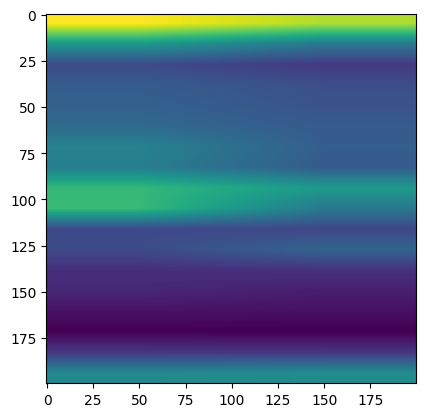

In [345]:
plt.imshow(a[1, :].reshape(200,200))

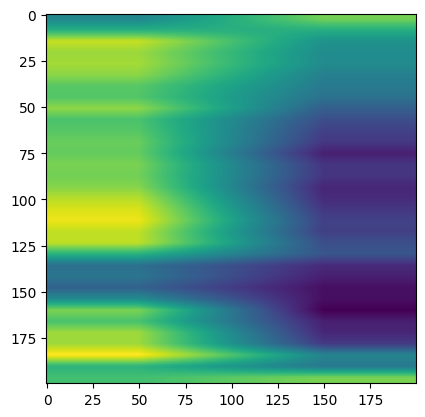

In [333]:
plt.imshow(np.array(X_test[0:1]).reshape(200,200))